In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import *

We can now define some useful functions

In [3]:
def prod(A,b):
    c = []
    for i in range(len(b)):
        c.append(sum([A[i][j] * b[j] for j in range(len(b))]))
    return(c)

def triDiag1(n):
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = 2
    for i in range(1,n):
        A[i][i] = 2
        A[i-1][i] = 1
        A[i][i-1] = 1
    
    return A

Jacobi iteration: $$x_i^{(k+1)} = \frac{b_i - \sum_{j \neq i} a_{ij} x_j^{(k)}}{a_{ii}}$$

In [4]:
def jacobiIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C = sum([A[i][j] * x_k[j] for j in range(i)]) + sum([A[i][j] * x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i] - C)/A[i][i])
    return(x_k1)

        

Gauss Seidel iteration: $$x_i^{(k+1)}=\frac{b_i-\sum_{j<i}a_{ij}x_j^{(k+1)}-\sum_{j>i}a_{ij}x_j^{(k)}}{a_{ii}}$$

In [11]:
def GaussSeidelIt(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C= sum([A[i][j]*x_k1[j] for j in range(i)])
        D= sum([A[i][j]*x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i]-C-D)/A[i][i])
    return(x_k1)
 

Let's define now a function to test the convergence of the iterative smoothers

In [6]:
def test(A,b,xi,iteration,niter,xe,titolo):
    asse_x = [float(i) for i  in range(0,niter+1)]
    asse_y = [sqrt(sum([(xi[j]-xe[j])**2 for j in range(len(xe))]))]

    
    for i in range(niter):
        xi = iteration(xi,A,b)
        norm = sqrt(sum([(xi[j]-xe[j])**2 for j in range(len(xe))]))
        asse_y.append(norm)

    plt.plot(asse_x,asse_y)
    plt.title(titolo)
    plt.xlabel("Iterations")
    plt.ylabel("|| e^k ||")
    plt.grid()
    plt.show()

Since $\{e^{i2k\pi}\}_{k\in \mathbb{N}}$ is a complete base, we can write every $x^{(k)}$ as a linear combination of different frequency base elements, so now we can easily study the speed of attenuation of different Fourier modes

In [7]:
#Let's create a list of lists [freq*n, niter] to do the tests easily
testList = [[1,1000],
            [2,250],
            [3,75],
            [4,30],
            [30,30],
            [50,30]]

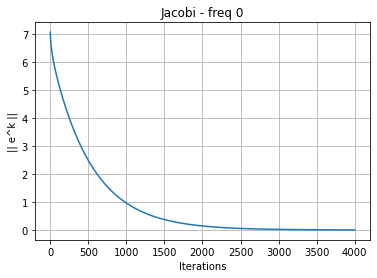

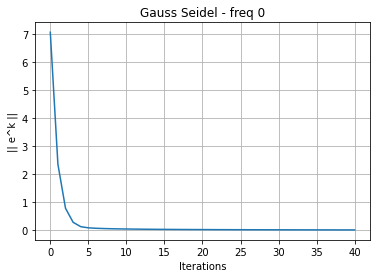

In [16]:
n = 50
A = triDiag1(n)
xe = [1. for i in range(n)]     
b = prod(A,xe)
x0 = [0. for i in range(n)]     #frequency = 0
test(A,b,x0,jacobiIteration,4000,xe,"Jacobi - freq 0")

x0 = [0. for i in range(n)]     #frequency = 0
test(A,b,x0,GaussSeidelIt,40,xe,"Gauss Seidel - freq 0")

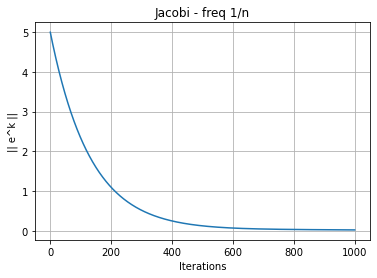

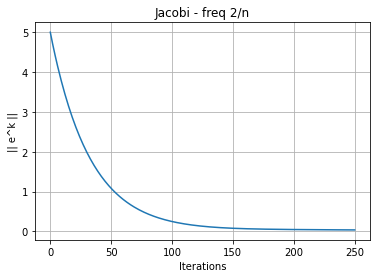

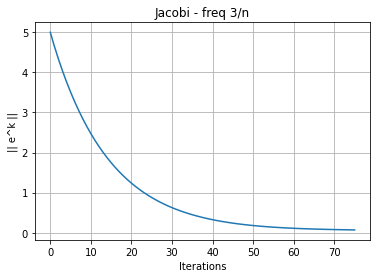

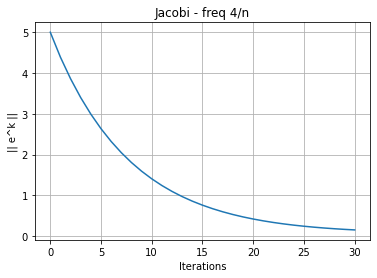

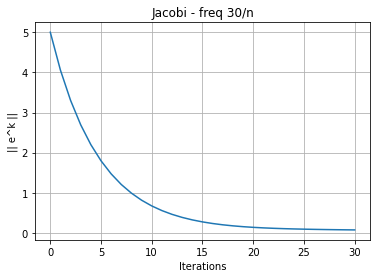

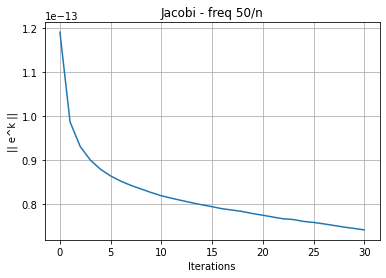

In [9]:
for case in testList:
    x0 = [sin(2*pi*i*case[0]/n) + 1 for i in range(n)]
    test(A,b,x0,jacobiIteration,case[1],xe,"Jacobi - freq "+str(case[0])+"/n")

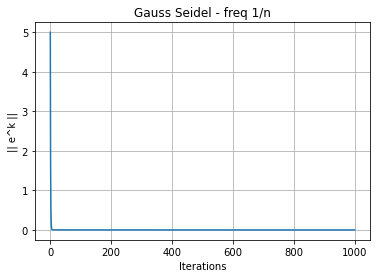

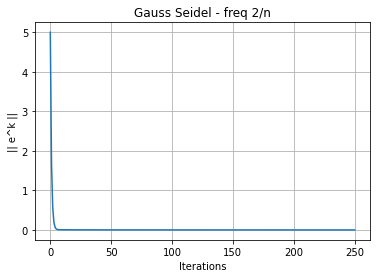

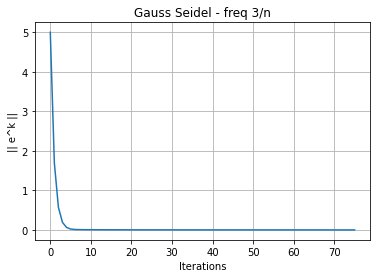

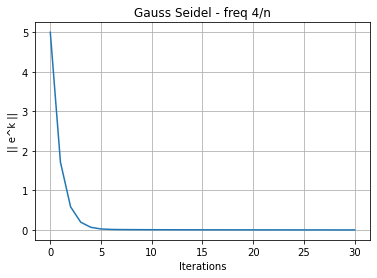

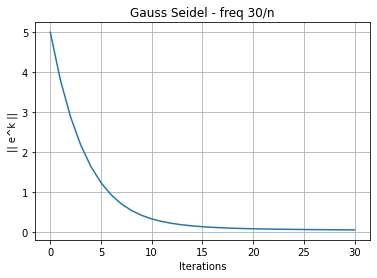

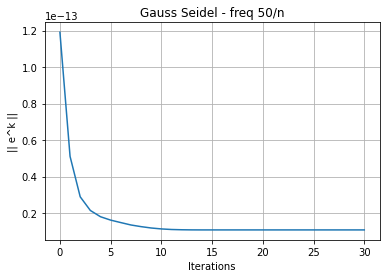

In [14]:
for case in testList:
    x0 = [sin(2*pi*i*case[0]/n) + 1 for i in range(n)]
    test(A,b,x0,GaussSeidelIt,case[1],xe,"Gauss Seidel - freq "+str(case[0])+"/n")